<a href="https://colab.research.google.com/github/deramireza/AlgorithmsUN2021I/blob/main/lab1/deramirezaLecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphical Representations of Data
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



Representing data graphically can be incredibly useful for learning how the data behaves and seeing potential structure or flaws. Care should be taken, as humans are incredibly good at seeing only evidence that confirms our beliefs, and visual data lends itself well to that. Plots are good to use when formulating a hypothesis, but should not be used to test a hypothesis.

We will go over some common plots here.

In [1]:
# Import our libraries

# This is for numerical processing
import numpy as np
# This is the library most commonly used for plotting in Python.
# Notice how we import it 'as' plt, this enables us to type plt
# rather than the full string every time.
import matplotlib.pyplot as plt

## Getting Some Data

If we're going to plot data we need some data to plot. We'll get the pricing data of Apple (AAPL) and Microsoft (MSFT) to use in our examples.

### Data Structure

Knowing the structure of your data is very important. Normally you'll have to do a ton of work molding your data into the form you need for testing. Quantopian has done a lot of cleaning on the data, but you still need to put it into the right shapes and formats for your purposes.

In this case the data will be returned as a pandas dataframe object. The rows are timestamps, and the columns are the two assets, AAPL and MSFT.

In [2]:
import pandas_datareader as pdr
import datetime 
data = pdr.get_data_yahoo(['AAPL', 'MSFT'], start=datetime.datetime(2014, 1, 1), end=datetime.datetime(2015, 1, 1))
data.head()

Attributes       High                   Low                  Open             \
Symbols          AAPL       MSFT       AAPL       MSFT       AAPL       MSFT   
Date                                                                           
2014-01-02  19.893929  37.400002  19.715000  37.099998  19.845715  37.349998   
2014-01-03  19.775000  37.220001  19.301071  36.599998  19.745001  37.200001   
2014-01-06  19.528570  36.889999  19.057142  36.110001  19.194643  36.849998   
2014-01-07  19.498571  36.490002  19.211430  36.209999  19.440001  36.330002   
2014-01-08  19.484285  36.139999  19.238930  35.580002  19.243214  36.000000   

Attributes      Close                  Volume              Adj Close  \
Symbols          AAPL       MSFT         AAPL        MSFT       AAPL   
Date                                                                   
2014-01-02  19.754642  37.160000  234684800.0  30632200.0  17.598297   
2014-01-03  19.320715  36.910000  392467600.0  31134800.0  17.211735   
2014-01-06  19.426071  36.130001  412610800.0  43603700.0  17.305593   
2014-01-07  19.287144  36.410000  317209200.0  35802800.0  17.181829   
2014-01-08  19.409286  35.759998  258529600.0  59971700.0  17.290642   

Attributes             
Symbols          MSFT  
Date                   
2014-01-02  32.057323  
2014-01-03  31.841665  
2014-01-06  31.168766  
2014-01-07  31.410315  
2014-01-08  30.849575

Indexing into the data with `data['AAPL']` will yield an error because the type of the columns are equity objects and not simple strings. Let's change that using this little piece of Python code. Don't worry about understanding it right now, unless you do, in which case congratulations.

In [4]:
data.columns = [e for e in data.columns]
data.head()

,"(High, AAPL)","(High, MSFT)","(Low, AAPL)","(Low, MSFT)","(Open, AAPL)","(Open, MSFT)","(Close, AAPL)","(Close, MSFT)","(Volume, AAPL)","(Volume, MSFT)","(Adj Close, AAPL)","(Adj Close, MSFT)"
Date,,,,,,,,,,,,
2014-01-02,19.893929,37.400002,19.715000,37.099998,19.845715,37.349998,19.754642,37.160000,234684800.0,30632200.0,17.598297,32.057323
2014-01-03,19.775000,37.220001,19.301071,36.599998,19.745001,37.200001,19.320715,36.910000,392467600.0,31134800.0,17.211735,31.841665
2014-01-06,19.528570,36.889999,19.057142,36.110001,19.194643,36.849998,19.426071,36.130001,412610800.0,43603700.0,17.305593,31.168766
2014-01-07,19.498571,36.490002,19.211430,36.209999,19.440001,36.330002,19.287144,36.410000,317209200.0,35802800.0,17.181829,31.410315
2014-01-08,19.484285,36.139999,19.238930,35.580002,19.243214,36.000000,19.409286,35.759998,258529600.0,59971700.0,17.290642,30.849575


Much nicer, now we can index. Indexing into the 2D dataframe will give us a 1D series object. The index for the series is timestamps, the value upon index is a price. Similar to an array except instead of integer indecies it's times.

In [5]:
data[data.keys()[1]].head()

Date
2014-01-02    37.400002
2014-01-03    37.220001
2014-01-06    36.889999
2014-01-07    36.490002
2014-01-08    36.139999
Name: (High, MSFT), dtype: float64

##Histogram

A histogram is a visualization of how frequent different values of data are. By displaying a frequency distribution using bars, it lets us quickly see where most of the observations are clustered. The height of each bar represents the number of observations that lie in each interval. You can think of a histogram as an empirical and discrete Probability Density Function (PDF).

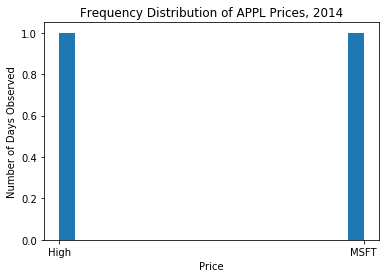

In [7]:
# Plot a histogram using 20 bins
plt.hist(data.keys()[1], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Prices, 2014');

### Returns Histogram

In finance rarely will we look at the distribution of prices. The reason for this is that prices are non-stationary and move around a lot. For more info on non-stationarity please see [this lecture](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity). Instead we will use daily returns. Let's try that now.

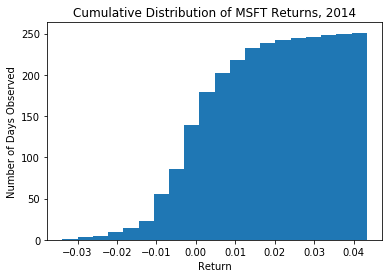

In [9]:
# Remove the first element because percent change from nothing to something is NaN
R = data.get(data.keys()[1]).pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of MSFT Returns, 2014');

The graph above shows, for example, that the daily returns of MSFT were above 0.03 on fewer than 5 days in 2014. Note that we are completely discarding the dates corresponding to these returns. 

#####IMPORTANT: Note also that this does not imply that future returns will have the same distribution.

### Cumulative Histogram (Discrete Estimated CDF)

An alternative way to display the data would be using a cumulative distribution function, in which the height of a bar represents the number of observations that lie in that bin or in one of the previous ones. This graph is always nondecreasing since you cannot have a negative number of observations. The choice of graph depends on the information you are interested in.

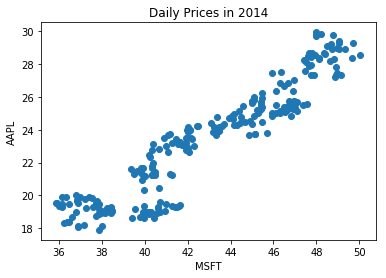

In [10]:

plt.scatter(data.get(data.keys()[1]), data.get(data.keys()[0]))
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices in 2014');

## Scatter plot

A scatter plot is useful for visualizing the relationship between two data sets. We use two data sets which have some sort of correspondence, such as the date on which the measurement was taken. Each point represents two corresponding values from the two data sets. However, we don't plot the date that the measurements were taken on.

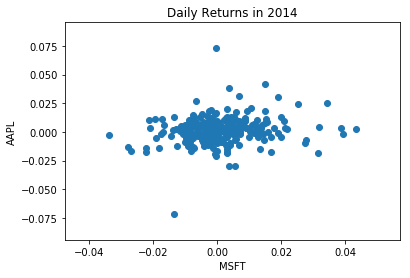

In [13]:


R_msft = data.get(data.keys()[1]).pct_change()[1:]
R_aapl = data.get(data.keys()[0]).pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Returns in 2014');

/usr/local/lib/python2.7/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


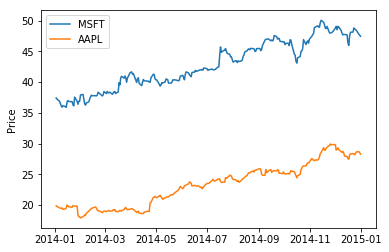

In [14]:
plt.plot(data.get(data.keys()[1]))
plt.plot(data.get(data.keys()[0]))
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

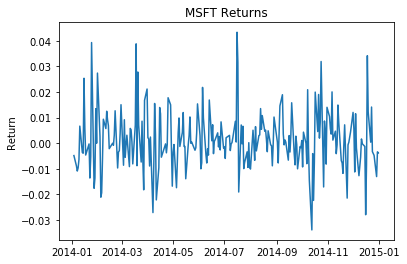

In [15]:
# Remove the first element because percent change from nothing to something is NaN
R = data.get(data.keys()[1]).pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');

# Line graph

A line graph can be used when we want to track the development of the y value as the x value changes. For instance, when we are plotting the price of a stock, showing it as a line graph instead of just plotting the data points makes it easier to follow the price over time. This necessarily involves "connecting the dots" between the data points, which can mask out changes that happened between the time we took measurements.

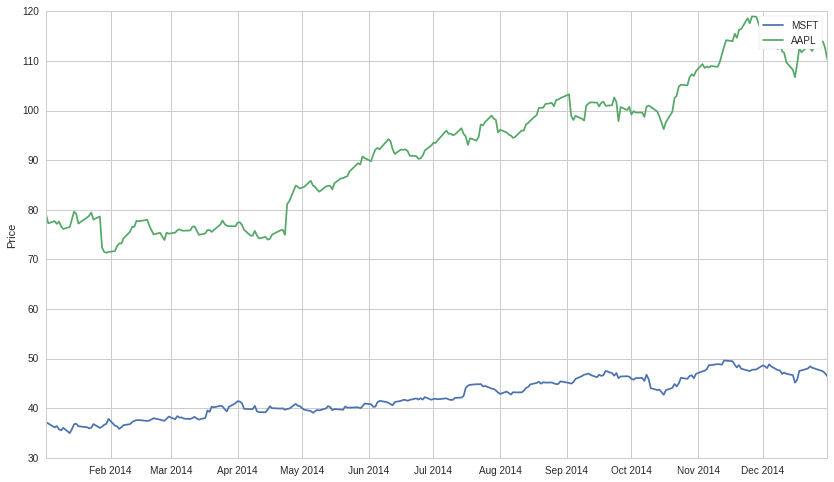

In [ ]:
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

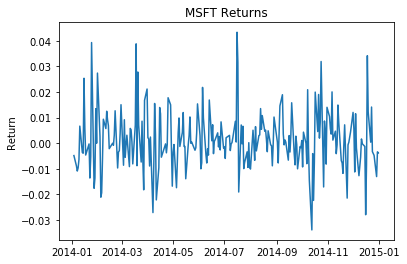

In [16]:
# Remove the first element because percent change from nothing to something is NaN
R = data.get(data.keys()[1]).pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');

## Never Assume Conditions Hold

Again, whenever using plots to visualize data, do not assume you can test a hypothesis by looking at a graph. Also do not assume that because a distribution or trend used to be true, it is still true. In general much more sophisticated and careful validation is required to test whether models hold. Plots are mainly useful when initially deciding how your models should work.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*